In [1]:
import sys
import os
import ssl
import certifi
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

# Add src/ to Python path
# sys.path.append(os.path.abspath(os.path.join("..", "src")))
# Add the root of the project (not just src) to sys.path
sys.path.append(os.path.abspath(".."))

os.environ['SSL_CERT_FILE'] = certifi.where()

# Import function
from src.data.download_data import download_stock_data

In [ ]:
# Download stock data

ticker = yf.Ticker("TSLA")
# df = ticker.history(start="2022-01-01", end="2023-01-01")
df = download_stock_data("TSLA", "2024-01-01", "2024-06-01")

if df is not None:
    print(f"[✓] Data shape: {df.shape}")
    display(df.head())
else:
    print("[!] Data download failed.")

# if df is None:
#     print("[!] Data download failed.")
# else:
#     print(f"[✓] Data shape: {df.shape}")
#     display(df.head())

📥 Downloading TSLA from Polygon.io...
[✓] Saved to data/raw/TSLA.csv
[✓] Data shape: (42, 6)


,Date,Open,High,Low,Close,Volume
0,2024-01-02 05:00:00,250.08,251.2500,244.4100,248.42,104654163.0
1,2024-01-03 05:00:00,244.98,245.6800,236.3200,238.45,121082599.0
2,2024-01-04 05:00:00,239.25,242.7000,237.7300,237.93,102618283.0
3,2024-01-05 05:00:00,236.86,240.1196,234.9001,237.49,92488939.0
4,2024-01-08 05:00:00,236.14,241.2500,235.3000,240.45,85163330.0


In [3]:
# Quick summary of the data
if df is not None:
    print("\nData Summary:")
    display(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nDate Range:")
    print(f"From {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")


Data Summary:


,Date,Open,High,Low,Close,Volume
count,42,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,2024-01-31 20:25:42.857142784,204.805595,208.235967,201.019100,204.696190,1.058248e+08
min,2024-01-02 05:00:00,177.210000,184.680000,175.010000,181.060000,7.884192e+07
25%,2024-01-17 11:00:00,189.040000,193.242500,185.646475,189.035000,9.255157e+07
50%,2024-01-31 17:00:00,198.275000,202.475000,194.700000,199.840000,1.045960e+08
75%,2024-02-14 23:00:00,215.040000,217.712500,211.192500,214.710000,1.116053e+08
max,2024-03-01 05:00:00,250.080000,251.250000,244.410000,248.420000,1.979239e+08
std,NaN,19.817868,19.142933,19.478264,18.953114,2.001778e+07



Missing Values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Date Range:
From 2024-01-02 05:00:00 to 2024-03-01 05:00:00


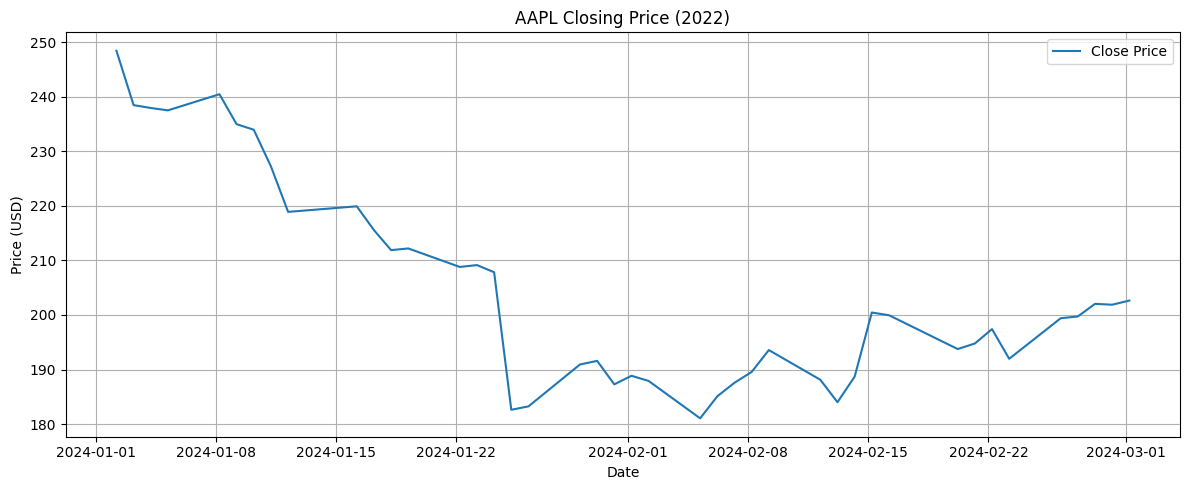

In [4]:
# Plot the closing price
if df is not None:
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="Close Price")
    plt.title("AAPL Closing Price (2022)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
import sys
print(sys.executable)

/Users/tony/AlphaVestra/.venv/bin/python
